In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

#Import OS
import os

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=54dc51afe3cfc555d7e0ae9a1f8344af


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | chato
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | the valley
Processing Record 9 of Set 1 | bubaque
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hovd
Processing Record 13 of Set 1 | pyryatyn
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | marfino
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | chikwawa
Processing Record 22 of Set 1 | tsihombe
City not foun

Processing Record 37 of Set 4 | tochio
Processing Record 38 of Set 4 | guerrero negro
Processing Record 39 of Set 4 | hualmay
Processing Record 40 of Set 4 | san policarpo
Processing Record 41 of Set 4 | hutchinson
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | mezen
Processing Record 44 of Set 4 | saint-augustin
Processing Record 45 of Set 4 | aguimes
Processing Record 46 of Set 4 | goryachegorsk
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | durango
Processing Record 49 of Set 4 | herat
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | lasa
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | bay-khaak
Processing Record 4 of Set 5 | tessalit
Processing Record 5 of Set 5 | kota kinabalu
Processing Record 6 of Set 5 | gotsu
Processing Record 7 of Set 5 | batagay
Processing Record 8 of Set 5 | ferkessedougou
Processing Record 9 of Set 5 | beringovskiy
Processing Record 10 of Set 5 | sas

Processing Record 27 of Set 8 | kosa
Processing Record 28 of Set 8 | hambantota
Processing Record 29 of Set 8 | rawson
Processing Record 30 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 31 of Set 8 | inuvik
Processing Record 32 of Set 8 | berlevag
Processing Record 33 of Set 8 | serro
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 8 | srednekolymsk
Processing Record 36 of Set 8 | mormugao
Processing Record 37 of Set 8 | vicuna
Processing Record 38 of Set 8 | riyadh
Processing Record 39 of Set 8 | severo-yeniseyskiy
Processing Record 40 of Set 8 | indramayu
Processing Record 41 of Set 8 | qaqortoq
Processing Record 42 of Set 8 | atbasar
Processing Record 43 of Set 8 | road town
Processing Record 44 of Set 8 | tabou
Processing Record 45 of Set 8 | tocopilla
Processing Record 46 of Set 8 | priyutnoye
Processing Record 47 of Set 8 | fort nelson
Processing Record 48 of Set 8 | toamasina
Processing Record 49 of Set

Processing Record 16 of Set 12 | samarai
Processing Record 17 of Set 12 | makakilo city
Processing Record 18 of Set 12 | ghanzi
Processing Record 19 of Set 12 | tpig
Processing Record 20 of Set 12 | skaudvile
Processing Record 21 of Set 12 | berdigestyakh
Processing Record 22 of Set 12 | youkounkoun
Processing Record 23 of Set 12 | flin flon
Processing Record 24 of Set 12 | kozachi laheri
Processing Record 25 of Set 12 | barbar
City not found. Skipping...
Processing Record 26 of Set 12 | baruun-urt
Processing Record 27 of Set 12 | chany
Processing Record 28 of Set 12 | vallenar
Processing Record 29 of Set 12 | thomaston
Processing Record 30 of Set 12 | tarakan
Processing Record 31 of Set 12 | humaita
Processing Record 32 of Set 12 | huicheng
Processing Record 33 of Set 12 | quatre cocos
Processing Record 34 of Set 12 | vostok
Processing Record 35 of Set 12 | ishigaki
Processing Record 36 of Set 12 | mahon
Processing Record 37 of Set 12 | iwanai
Processing Record 38 of Set 12 | havelock

In [7]:
len(city_data)

553

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,-21.24,97,34,2.21,RU,2020-02-21 23:38:03
1,Hermanus,-34.42,19.23,68.00,83,53,5.01,ZA,2020-02-21 23:40:00
2,Rikitea,-23.12,-134.97,79.11,61,33,5.03,PF,2020-02-21 23:40:00
3,Barrow,71.29,-156.79,-9.40,76,90,10.29,US,2020-02-21 23:40:01
4,Chato,-2.64,31.77,73.26,77,75,8.25,TZ,2020-02-21 23:40:01
5,Dunedin,-45.87,170.50,57.00,72,100,13.00,NZ,2020-02-21 23:38:38
6,The Valley,18.22,-63.06,77.00,69,40,6.93,AI,2020-02-21 23:40:02
7,Bubaque,11.28,-15.83,79.59,70,81,13.49,GW,2020-02-21 23:35:20
8,Khatanga,71.97,102.50,-15.83,96,34,8.46,RU,2020-02-21 23:37:24
9,Jamestown,42.10,-79.24,30.20,54,1,10.29,US,2020-02-21 23:36:33


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2020-02-21 23:38:03,70.63,147.92,-21.24,97,34,2.21
1,Hermanus,ZA,2020-02-21 23:40:00,-34.42,19.23,68.00,83,53,5.01
2,Rikitea,PF,2020-02-21 23:40:00,-23.12,-134.97,79.11,61,33,5.03
3,Barrow,US,2020-02-21 23:40:01,71.29,-156.79,-9.40,76,90,10.29
4,Chato,TZ,2020-02-21 23:40:01,-2.64,31.77,73.26,77,75,8.25
5,Dunedin,NZ,2020-02-21 23:38:38,-45.87,170.50,57.00,72,100,13.00
6,The Valley,AI,2020-02-21 23:40:02,18.22,-63.06,77.00,69,40,6.93
7,Bubaque,GW,2020-02-21 23:35:20,11.28,-15.83,79.59,70,81,13.49
8,Khatanga,RU,2020-02-21 23:37:24,71.97,102.50,-15.83,96,34,8.46
9,Jamestown,US,2020-02-21 23:36:33,42.10,-79.24,30.20,54,1,10.29


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582328517.7775118

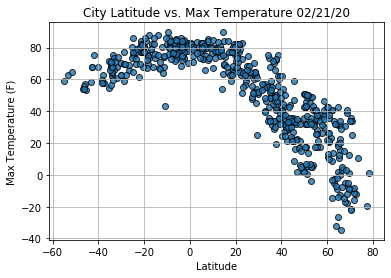

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

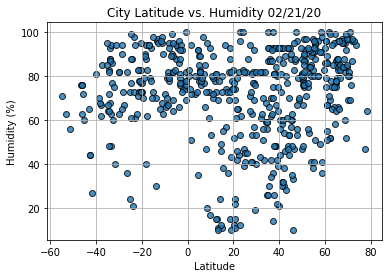

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

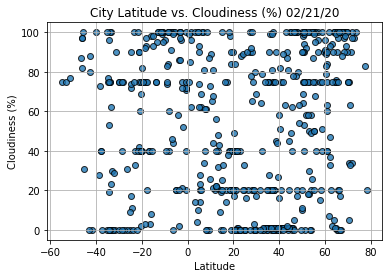

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

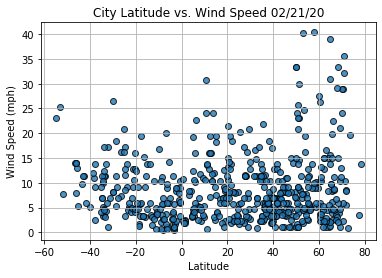

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

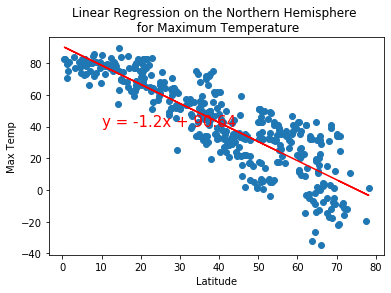

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
r_title = "Linear Regression on the Northern Hemisphere \n for Maximum Temperature"
# Call the function.
plot_linear_regression(x_values, y_values, r_title,'Max Temp',(10,40))

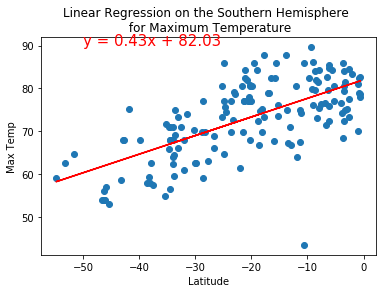

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
r_title = "Linear Regression on the Southern Hemisphere \n for Maximum Temperature"
# Call the function.
plot_linear_regression(x_values, y_values, r_title, 'Max Temp',(-50,90))

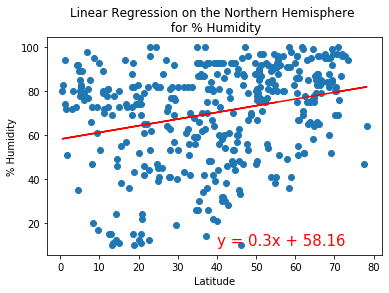

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

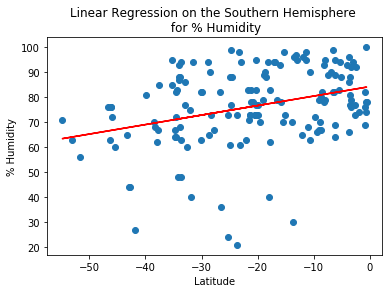

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

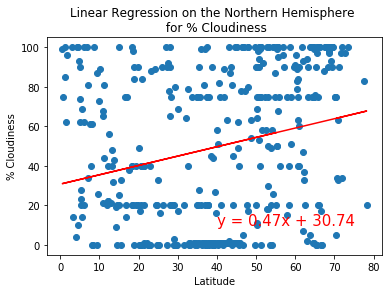

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

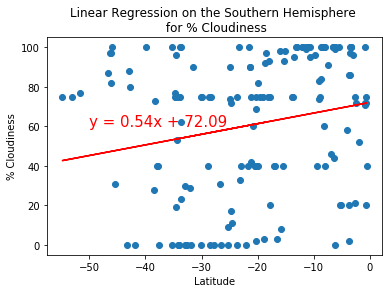

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

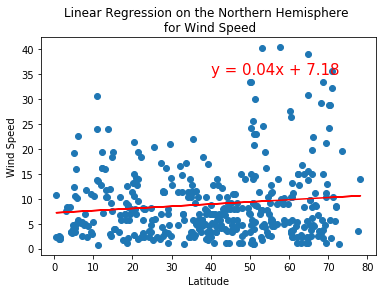

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))